In [1]:
 # The merger rate of the PBH binaries without DM halos assuming that t_merge holds for vaccum only.
# m_j = m_2
# m_i = m_1  and m_2< equal to m_1.

import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.integrate import odeint
from scipy.integrate import quad
import seaborn as sns
from matplotlib import rcParams
from scipy.interpolate import InterpolatedUnivariateSpline



plt.rcParams.update({
  "text.usetex": True,
  "font.family": "serif"
})    


π = np.pi
G = 4.4959e-15            #in units of M☉^-1 pc^3 yr^-2
c = 0.3068                #in units of pc yr^-1
ρ_eq = 3.1812e3           #in units of M☉ pc^-3 with ρ_eq=2.15368e-16 kg m^-3
pc = 3.0857e16            # in meters
yr = 3.154e7              # in units of seconds
t_eq = 1.59246e12/yr      # in units of seconds
t_m = 13.78e9             #in units of yrs corresponding to t_0=13.78Gyr
t_0 = 13.78e9             #in units of yrs corresponding to t_0=13.78Gyr

σ_eq = 0.005
ρ_m = 4e19                #ρ_m = 4e19 M☉ Gpc^-3



def interpolation(x, y, variable):
    g =  InterpolatedUnivariateSpline(x, y, ext = 2, k= 1) # j_i = g(t_m)
    return g(variable)
              

# Merger rate of  PBH binaries without and with halos for PBHs mass range of 5 M☉-100 M☉ .
# As per LIGO/VIRGO/KAGRA limits having merger rates of BBHs in range m_1 = [5, 100] M☉
# and m_2 = [5, 100] M☉, the updated merger rates as per the third run are 
# R_12 = (17.9 - 44) Gpc⁻3 yr⁻1. So, in the calculations of the merger rate 
# we shall be using f_pbh and hence f at R_12 = 44 Gpc⁻3 yr⁻1 so that we don't 
# exceed the upper limit of the merger rate as per 3rd run of LIGO/VIRGO/KAGRA.
    
def merger_rate(m_1, m_2, Δ_1, Δ_2, t_m, DM_halos_presence):
    
    if  m_1 < 5:  
        return 0
    
    elif m_2 < 5:
        return 0
    
    else:
        
        X = np.geomspace(X_min, X_max, 1000000) 
        
        def f_(m):
            return f*P(m)

        def f_b(m_1,m_2):
            return  f_(m_1) + f_(m_2)
        
        
        def λ(m_1, m_2, Δ_1, Δ_2, X):   #λ_0
            return  X/(f_b(m_1,m_2) * np.sqrt(Δ_1*Δ_2))
    
    
        def PDF(m):
            return (P(m)/m)


        I = quad(PDF, m_min, m_max)             # Taking limits of the PBH mass from m_min M☉ to m_max M☉ instead of 
                                             # 0 to infinity.

        n_T = f * ρ_eq * I[0]                #n_T=f*ρ_eq∫(P(m)/m)*dm 

        def x̄(m_1,m_2,Δ_1,Δ_2):
            return (((3 * (m_1 + m_2))/(8 * π * ρ_eq * f_b(m_1,m_2) * np.sqrt(Δ_1 * Δ_2)))**(1/3))
    
        
        if DM_halos_presence == 'False':
        
           # Merger rate of  PBH binaries without halos for PBHs mass range of 5 M☉-100 M☉ .
        
        
            k = 22.3819
            A = ((ρ_eq**(4/3))*(G**3)*(k**7))/(c**5)

            def B_nohalo(m_1,m_2,Δ_1,Δ_2):
                return (A**(1/7)) * ((m_1 * m_2 * t_m)**(1/7)) * ((m_1 + m_2)**(-1/21)) * ((f_b(m_1,m_2))**(37/21)) * ((f**2 + 1.1994*(σ_eq**2))**(-1/2)) * ((Δ_1*Δ_2)**(37/42))

        
        
            def γ_X_nohalo(m_1,m_2,Δ_1,Δ_2, X):        #eq.(12) in the notes.
                return (((1 + 0.1709 * λ(m_1, m_2, Δ_1, Δ_2, X))**(-1/14))/(1 + 0.0443 * λ(m_1, m_2, Δ_1, Δ_2, X))) *  B_nohalo(m_1,m_2,Δ_1,Δ_2) * (X**(-37/21))
            
       
        
            def integrand_nohalo(m_1,m_2,Δ_1,Δ_2, X):
                return  np.exp(-((4*π)/3)  * (x̄(m_1,m_2,Δ_1,Δ_2)**3) * n_T * X) * ((γ_X_nohalo(m_1,m_2,Δ_1,Δ_2, X)**2) / ((1 + (γ_X_nohalo(m_1,m_2,Δ_1,Δ_2, X)**2))**(3/2)))
        
        
            return (1/(14 * t_m)) *  ρ_m *  ((f**2)/(f_b(m_1,m_2)*np.sqrt(Δ_1*Δ_2))) *  (m_1 + m_2) * np.minimum((P(m_1)*Δ_1)/m_1, (P(m_2)*Δ_2)/m_2) * ((P(m_1)*Δ_1)/m_1 + (P(m_2)*Δ_2)/m_2)  * (np.trapz(integrand_nohalo(m_1,m_2,Δ_1,Δ_2, X),X)) 
    
        
        else:

            # Merger rate of  PBH binaries with halos for PBHs mass range of 5 M☉-100 M☉ .
            
            def s(m_1, m_2, Δ_1, Δ_2, X): # S_dec of the binary decouple.
                return ((0.03095*λ(m_1, m_2, Δ_1, Δ_2, X)+ 0.3425)*λ(m_1, m_2, Δ_1, Δ_2, X))

            def t(m_1, m_2, Δ_1, Δ_2, X):  #t_dec of the binary decouple.
                return ((np.sqrt(3/(8*π*G*ρ_eq)))*(((2/3)*(s(m_1, m_2, Δ_1, Δ_2, X)-2)*np.sqrt(s(m_1, m_2, Δ_1, Δ_2, X)+1))+(4/3)))


            def ρ_bar(m):
                return ((ρ_eq/2)*(t_eq**(3/2))*((2*G*m)**(3/4))) 

            def M_halo(m, m_1, m_2, Δ_1, Δ_2, X):
                return (((16*π)/3)*ρ_bar(m)*((2 * G * m *(t(m_1, m_2, Δ_1, Δ_2, X)**2))**(1/4)))


            def M(m, m_1, m_2, Δ_1, Δ_2, X):
                return (m + M_halo(m, m_1, m_2, Δ_1, Δ_2, X))

        

            def M_binary_initial(m_1, m_2, Δ_1, Δ_2, X):
                return (m_1 + m_2 + M_halo(m_1, m_1, m_2, Δ_1, Δ_2, X) + M_halo(m_2, m_1, m_2, Δ_1, Δ_2, X))


            #Schwarzchild Radius of the PBH.
            def r_s(m): 
                return ((2*G*m)/(c**2)) 


            #r_turnaround of the dark matter halos, eq.(5) in "WIMPs and stellar-mass primordial black holes are incompatible"
            def r_ta(m): 
                return ((2*G*m*(t(m_1, m_2, Δ_1, Δ_2, X)**2))**(1/3))


            # The binding energy, E_b of the dark matter halos calculated within r_s and r_ta for dark matter halo's density profile of ρ(r)∝ r^{-9/4}
            def E_b(m): 
                return ((16*π*G*ρ_bar(m)*m*(((r_ta(m))**(-1/4))-((r_s(m))**(-1/4))))-((128/3)*G*(π**2)*(ρ_bar(m)**2)*(((r_ta(m))**(1/2))-((r_s(m))**(1/2)))))



            def a_initial(m_1, m_2, Δ_1, Δ_2, X):
                return  (0.0977* λ(m_1, m_2, Δ_1, Δ_2, X) + 0.0057 * (λ(m_1, m_2, Δ_1, Δ_2, X)**2)) * x̄(m_1,m_2,Δ_1,Δ_2) * (X**(1/3))

            def beta(m_1,m_2,Δ_1, Δ_2, X):
                return ((G * m_1 * m_2)/((G * M(m_1, m_1, m_2, Δ_1, Δ_2, X) * M(m_2, m_1, m_2, Δ_1, Δ_2, X))-(2 * a_initial(m_1, m_2, Δ_1, Δ_2, X) * (E_b(m_1) + E_b(m_2)))))


            k = 22.3387
            A = ((ρ_eq**(4/3))*(G**3)*(k**7))/(c**5)

            def B_halo(m_1,m_2,Δ_1,Δ_2):
                return (A**(1/7)) * ((m_1 * m_2 * t_m)**(1/7))  *   ((m_1 + m_2)**(-23/42)) * ((f_b(m_1,m_2))**(37/21))* ((f**2 + 0.2998 *(σ_eq**2))**(-1/2)) * ((Δ_1*Δ_2)**(37/42)) 

        
        
            def γ_X_halo(m_1,m_2,Δ_1,Δ_2, X):      #eq.(12) in the notes.
                return (((1 + 0.0583 * λ(m_1, m_2, Δ_1, Δ_2, X))**(-1/14))/(1 + 0.0857 * λ(m_1, m_2, Δ_1, Δ_2, X))) *  B_halo(m_1,m_2,Δ_1,Δ_2)   * (X**(-37/21))  * (beta(m_1,m_2,Δ_1, Δ_2, X)**(-1/14)) *  np.sqrt(M_binary_initial(m_1, m_2, Δ_1, Δ_2, X))
        
        
        
            def integrand_halo(m_1,m_2,Δ_1,Δ_2, X):
                return  np.exp(-((4*π)/3)  * (x̄(m_1,m_2,Δ_1,Δ_2)**3) * n_T * X) * ((γ_X_halo(m_1,m_2,Δ_1,Δ_2, X)**2) / ((1 + (γ_X_halo(m_1,m_2,Δ_1,Δ_2, X)**2))**(3/2)))
    

            return (1/(14 * t_m)) *  ρ_m *  ((f**2)/(f_b(m_1,m_2)*np.sqrt(Δ_1*Δ_2))) *  (m_1 + m_2) * np.minimum((P(m_1)*Δ_1)/m_1, (P(m_2)*Δ_2)/m_2) * ((P(m_1)*Δ_1)/m_1 + (P(m_2)*Δ_2)/m_2)  * (np.trapz(integrand_halo(m_1,m_2,Δ_1,Δ_2, X),X)) 
      

In [2]:
m_1 = 7       #in units of M☉
m_2 = 9      #in units of M☉



y_1 = np.log(m_1)
y_2 = np.log(m_2)
dy = (y_2-y_1)


y_list = np.zeros(11)

for i in range(len(y_list)):
    y_list[i] = (y_1 + (i*dy))
    

M_1_list = np.zeros(len(y_list))
M_2_list = np.zeros(len(y_list))

for i, y in enumerate(y_list):
    M_1_list[i] = (np.ceil(np.exp(y)))
    M_2_list[i] = (np.ceil(np.exp(y)))
    

            
m_1_list = [int(M_1) for M_1 in M_1_list]
m_2_list = [int(M_2) for M_2 in M_2_list]

    
Δ_1_list = np.zeros(len(y_list))
Δ_2_list = np.zeros(len(y_list))

for i, y in enumerate(y_list):
    Δ_1_list[i] = np.exp(y + 0.5*dy) - np.exp(y - 0.5*dy)
    Δ_2_list[i] = np.exp(y + 0.5*dy) - np.exp(y - 0.5*dy) 

    
print("m_1 =", m_1_list, "M☉")
print('\v')
print("Δ_1 =", Δ_1_list)




m_min = 5     #in units of M☉
m_max = 100   # in units of M☉

X_min = 1e-6
X_max = 1e5

f = np.geomspace(1e-4, 1, 11)
f_pbh = f/0.85
f_pbh_list = f_pbh.tolist()

m_1 = [7, 10, 12, 15, 20, 25, 32, 41, 53, 68, 87] M☉

Δ_1 = [ 1.76383421  2.26778684  2.91572593  3.74879049  4.81987348  6.19698019
  7.96754596 10.24398767 13.17084129 16.9339388  21.77220702]


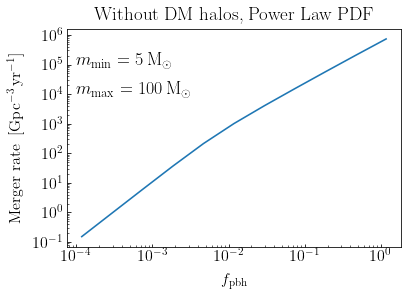

In [3]:
# Calculation of the 2D merger rate for Powerlaw PBH mass distribution. 
#The resolution of the PBHs masses m_1 is Δ_1 and of m_2 is Δ_2.

DM_halos_presence = 'False'
Merger_PWR_1 = np.zeros((11, 11))
merge_PWR_1 = np.zeros(len(m_1_list))


for z, f_pbh in enumerate(f_pbh_list):
    
    merger_sum = 0
    
    for i, (m_1, Δ_1)  in enumerate(zip(m_1_list, Δ_1_list)):
        
        merger_individual = 0
        
        for j, (m_2, Δ_2)  in enumerate(zip(m_2_list, Δ_2_list)):
         
            
            f =  f_pbh*0.85
            
            def P(m): #Powerlaw PBH mass distribution
                α = 1.6
                M = 5     #in units of M☉, for PBHs mass range of m_min = 5 M☉ - m_min = 100 M☉ .
                return ((α-1)/M) * ((m/M)**(-α))

            if i==j:
                Merger_PWR_1[i,j] = 0.5 * merger_rate(m_1, m_2, Δ_1, Δ_2, t_m, DM_halos_presence)
            
            else:
                Merger_PWR_1[i,j] = merger_rate( m_1, m_2, Δ_1, Δ_2, t_m, DM_halos_presence)   
            
            if m_1 > m_2:
                merger_individual = merger_individual +  Merger_PWR_1[i,j]
        
            else:
                merger_individual = 0
            
            merger_sum = merger_sum + merger_individual
            
            merge_PWR_1[z]  = merger_sum
            

np.save("merge_PWR_1", merge_PWR_1)




plt.figure(figsize = (6, 4))
plt.rcParams['font.family'] = 'serif'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'


plt.text(1e-4, 1e5, "$m_\mathrm{{min}} = 5 \: \mathrm{M_{\odot}}$", size = 18)
plt.text(1e-4, 1e4, "$m_\mathrm{{max}} = 100 \: \mathrm{M_{\odot}}$", size = 18)


plt.rc('lines', linewidth = 1.6)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.loglog(f_pbh_list, merge_PWR_1)
plt.xlabel('$f_\mathrm{{pbh}}$', fontsize = 16, labelpad = 9)
plt.ylabel('Merger rate $\,[\mathrm{Gpc^{-3}\,yr^{-1}}]$', fontsize = 16, labelpad = 9)
plt.title('Without DM halos, Power Law PDF', fontsize = 19, pad = 9)
plt.show()

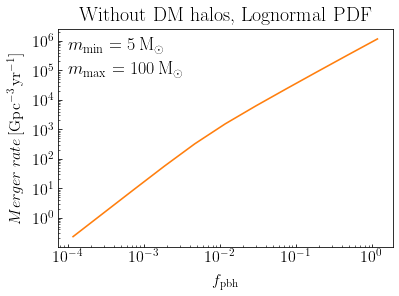

In [4]:
# Calculation of the 2D merger rate for Powerlaw PBH mass distribution. 
#The resolution of the PBHs masses m_1 is Δ_1 and of m_2 is Δ_2.


DM_halos_presence = 'False'
Merger_Lognormal_1 = np.zeros((11, 11))


merge_Lognormal_1 = np.zeros(len(m_1_list))


for z, f_pbh in enumerate(f_pbh_list):
    
    merger_sum = 0
    
    for i, (m_1, Δ_1)  in enumerate(zip(m_1_list, Δ_1_list)):
        
        merger_individual = 0
        
        for j, (m_2, Δ_2)  in enumerate(zip(m_2_list, Δ_2_list)):
         
            
            f = f_pbh * 0.85
            
            def P(m):                  #Log-Normal PBH mass Distribution
                σ = 0.6
                m_c = 15               #in units of M☉, for PBHs mass range of m_min = 5 M☉ - m_max = 100 M☉ .
                return  (1/(σ * m * np.sqrt(2*π))) * np.exp(-(((np.log(m/m_c))**2)/(2*(σ**2))))

            if i==j:
                Merger_Lognormal_1[i,j] = 0.5 * merger_rate(m_1, m_2, Δ_1, Δ_2, t_m, DM_halos_presence)
            
            else:
                Merger_Lognormal_1[i,j] = merger_rate( m_1, m_2, Δ_1, Δ_2, t_m, DM_halos_presence)   
            
            
            if m_1 > m_2:
                merger_individual = merger_individual +  Merger_Lognormal_1[i,j]
        
            else:
                merger_individual = 0
            
            merger_sum = merger_sum + merger_individual
    
            merge_Lognormal_1[z]  = merger_sum
   
        
np.save("merge_Lognormal_1", merge_Lognormal_1)
    

    
    
plt.figure(figsize = (6, 4))
plt.rcParams['font.family'] = 'serif'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'


plt.text(1e-4, 5e5, "$m_\mathrm{{min}} = 5 \: \mathrm{M_{\odot}}$", size = 18)
plt.text(1e-4, 8e4, "$m_\mathrm{{max}} = 100 \: \mathrm{M_{\odot}}$", size = 18)


plt.rc('lines', linewidth = 1.6)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.loglog(f_pbh_list, merge_Lognormal_1, 'C1')
plt.xlabel('$f_\mathrm{{pbh}}$', fontsize = 16, labelpad = 9)
plt.ylabel('$Merger \: rate\,[\mathrm{Gpc^{-3}\,yr^{-1}}]$', fontsize = 16, labelpad = 9)
plt.title('Without DM halos, Lognormal PDF', fontsize = 20, pad = 9)
plt.show()

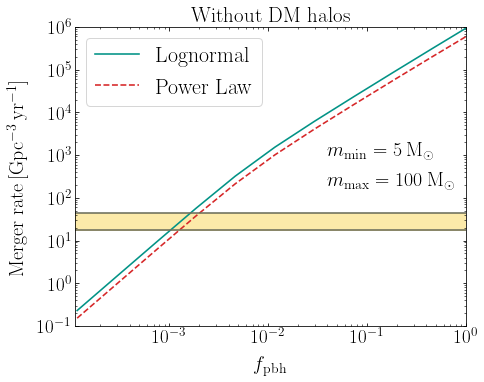

f_pbh_PWR_17.9 = 1.17e-03
f_pbh_PWR_44 = 1.97e-03

f_pbh_Lognormal_17.9 = 9.52e-04
f_pbh_Lognormal_44 = 1.57e-03


In [5]:
merge_PWR_1 = np.load('merge_PWR_1.npy')
merge_Lognormal_1 = np.load('merge_Lognormal_1.npy')



plt.figure(figsize = (7, 5.5))
plt.rcParams['font.family'] = 'serif'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.tick_params(which='both', right=True, top=True)

plt.text(4e-2, 1e3, "$m_\mathrm{{min}} = 5 \: \mathrm{M_{\odot}}$", size = 20)
plt.text(4e-2, 0.2e3, "$m_\mathrm{{max}} = 100 \: \mathrm{M_{\odot}}$", size = 20)


plt.rc('lines', linewidth = 1.6)
plt.xticks(fontsize = 19)
plt.yticks(fontsize = 19)

plt.loglog(f_pbh_list, merge_Lognormal_1, '#029386')
plt.loglog(f_pbh_list, merge_PWR_1, 'C3', linestyle = '--')


plt.xlim(1.12e-4, 1)
plt.ylim(0.1, 1e6)


plt.axhline(y = 17.9, color = '#6E705E')
plt.axhline(y = 44, color = '#6E705E')
plt.axhspan(17.9, 44, 1e-4, 1, color='#FBDD70', alpha=0.6)


plt.xlabel('$f_\mathrm{{pbh}}$', fontsize = 20, labelpad = 9)
plt.ylabel('Merger  rate$\,[\mathrm{Gpc^{-3}\,yr^{-1}}]$', fontsize = 20, labelpad = 9)
plt.legend([ "Lognormal", "Power Law"], prop = {'size':22}, loc = 'upper left', 
           facecolor = 'white', fontsize = 110)
plt.title('Without DM halos', fontsize = 21)
plt.savefig('mergervsfnoDM.pdf', bbox_inches = 'tight')
plt.show()



# Since for BBHs the merger rates detected by LIGO are in range (12 - 213) Gpc⁻3 yr^-1. 
# So, Huang paper follows the method of plotting merger rate vs f_pbh and then picking out the 
# values of f_pbh = f * 0.85 for the values of f having merger rate at 12 Gpc⁻3 yr^-1 and 213 Gpc⁻3 yr^-1.
# And this is how they set a limit to f_pbh as per the mergers seen by LIGO. 

# So, I tried doing the same and see if the values of f and f_pbh used by us so far in the calculations of 
# merger rates are in the same limit or not. Turns out not. 
# In our case f_pbh is having smaller values for both Power Law and Lognoraml PDF.


f_pbh_PWR_lowerlimit = interpolation(merge_PWR_1, f_pbh_list, 17.9)
f_pbh_PWR_upperlimit = interpolation(merge_PWR_1, f_pbh_list, 44)
f_pbh_Lognormal_lowerlimit = interpolation(merge_Lognormal_1, f_pbh_list, 17.9)
f_pbh_Lognormal_upperlimit = interpolation(merge_Lognormal_1, f_pbh_list, 44)


print("f_pbh_PWR_17.9 =", '%0.2e'%f_pbh_PWR_lowerlimit)
print("f_pbh_PWR_44 =", '%0.2e'%f_pbh_PWR_upperlimit)
print('\v')
print("f_pbh_Lognormal_17.9 =", '%0.2e'%f_pbh_Lognormal_lowerlimit)
print("f_pbh_Lognormal_44 =", '%0.2e'%f_pbh_Lognormal_upperlimit)

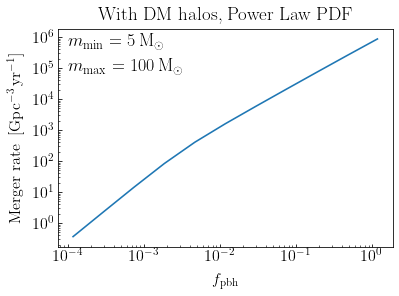

In [6]:
# Calculation of the 2D merger rate for Powerlaw PBH mass distribution. 
#The resolution of the PBHs masses m_1 is Δ_1 and of m_2 is Δ_2.

DM_halos_presence = 'True'
Merger_PWRhalo_1 = np.zeros((11, 11))
merge_PWRhalo_1 = np.zeros(len(m_1_list))


for z, f_pbh in enumerate(f_pbh_list):
    
    merger_sum = 0
    
    for i, (m_1, Δ_1)  in enumerate(zip(m_1_list, Δ_1_list)):
        
        merger_individual = 0
        
        for j, (m_2, Δ_2)  in enumerate(zip(m_2_list, Δ_2_list)):
         
            
            f =  f_pbh*0.85
           
            def P(m): #Powerlaw PBH mass distribution
                α = 1.6
                M = 5     #in units of M☉, for PBHs mass range of m_min = 5 M☉ - m_min = 100 M☉ .
                return ((α-1)/M) * ((m/M)**(-α))

            if i==j:
                Merger_PWRhalo_1[i,j] = 0.5 * merger_rate(m_1, m_2, Δ_1, Δ_2, t_m, DM_halos_presence)
            
            else:
                Merger_PWRhalo_1[i,j] = merger_rate( m_1, m_2, Δ_1, Δ_2, t_m, DM_halos_presence)   
            
            if m_1 > m_2:
                merger_individual = merger_individual +  Merger_PWRhalo_1[i,j]
        
            else:
                merger_individual = 0
            
            merger_sum = merger_sum + merger_individual
            
            merge_PWRhalo_1[z]  = merger_sum
            

np.save("merge_PWRhalo_1", merge_PWRhalo_1)




plt.figure(figsize = (6, 4))
plt.rcParams['font.family'] = 'serif'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'


plt.text(1e-4, 5e5, "$m_\mathrm{{min}} = 5 \: \mathrm{M_{\odot}}$", size = 18)
plt.text(1e-4, 8e4, "$m_\mathrm{{max}} = 100 \: \mathrm{M_{\odot}}$", size = 18)


plt.rc('lines', linewidth = 1.6)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.loglog(f_pbh_list, merge_PWRhalo_1)
plt.xlabel('$f_\mathrm{{pbh}}$', fontsize = 16, labelpad = 9)
plt.ylabel('Merger rate $\,[\mathrm{Gpc^{-3}\,yr^{-1}}]$', fontsize = 16, labelpad = 9)
plt.title('With DM halos, Power Law PDF', fontsize = 19, pad = 9)
plt.show()

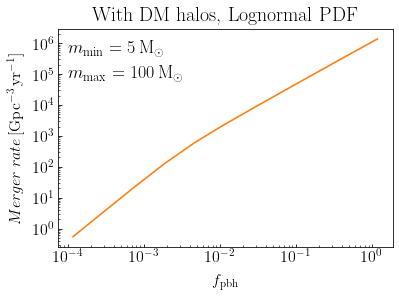

In [7]:
# Calculation of the 2D merger rate for Powerlaw PBH mass distribution. 
#The resolution of the PBHs masses m_1 is Δ_1 and of m_2 is Δ_2.


DM_halos_presence = 'True'
Merger_Lognormalhalo_1 = np.zeros((11, 11))


merge_Lognormalhalo_1 = np.zeros(len(m_1_list))


for z, f_pbh in enumerate(f_pbh_list):
    
    merger_sum = 0
    
    for i, (m_1, Δ_1)  in enumerate(zip(m_1_list, Δ_1_list)):
        
        merger_individual = 0
        
        for j, (m_2, Δ_2)  in enumerate(zip(m_2_list, Δ_2_list)):
         
            
            f = f_pbh * 0.85
            
            def P(m):                  #Log-Normal PBH mass Distribution
                σ = 0.6
                m_c = 15               #in units of M☉, for PBHs mass range of m_min = 5 M☉ - m_max = 100 M☉ .
                return  (1/(σ * m * np.sqrt(2*π))) * np.exp(-(((np.log(m/m_c))**2)/(2*(σ**2))))

            if i==j:
                Merger_Lognormalhalo_1[i,j] = 0.5 * merger_rate(m_1, m_2, Δ_1, Δ_2, t_m, DM_halos_presence)
            
            else:
                Merger_Lognormalhalo_1[i,j] = merger_rate( m_1, m_2, Δ_1, Δ_2, t_m, DM_halos_presence)   
            
            
            if m_1 > m_2:
                merger_individual = merger_individual +  Merger_Lognormalhalo_1[i,j]
        
            else:
                merger_individual = 0
            
            merger_sum = merger_sum + merger_individual
    
            merge_Lognormalhalo_1[z]  = merger_sum
   
        
np.save("merge_Lognormalhalo_1", merge_Lognormalhalo_1)
    

    
    
plt.figure(figsize = (6, 4))
plt.rcParams['font.family'] = 'serif'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'


plt.text(1e-4, 5e5, "$m_\mathrm{{min}} = 5 \: \mathrm{M_{\odot}}$", size = 18)
plt.text(1e-4, 8e4, "$m_\mathrm{{max}} = 100 \: \mathrm{M_{\odot}}$", size = 18)


plt.rc('lines', linewidth = 1.6)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.loglog(f_pbh_list, merge_Lognormalhalo_1, 'C1')
plt.xlabel('$f_\mathrm{{pbh}}$', fontsize = 16, labelpad = 9)
plt.ylabel('$Merger \: rate\,[\mathrm{Gpc^{-3}\,yr^{-1}}]$', fontsize = 16, labelpad = 9)
plt.title('With DM halos, Lognormal PDF', fontsize = 20, pad = 9)
plt.show()

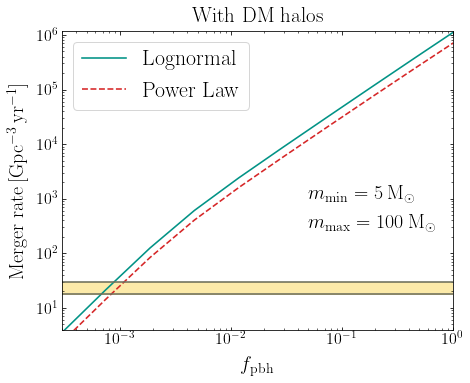

f_pbh_PWRhalo_17.9 = 8.00e-04
f_pbh_PWRhalo_44 = 1.22e-03

f_pbh_Lognormalhalo_17.9 = 6.56e-04
f_pbh_Lognormalhalo_44 = 9.87e-04


In [8]:
merge_Lognormalhalo_1 = np.load('merge_Lognormalhalo_1.npy')
merge_PWRhalo_1 = np.load('merge_PWRhalo_1.npy')



plt.figure(figsize = (7, 5.5))
plt.rcParams['font.family'] = 'serif'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.tick_params(which='both', right=True, top=True)

plt.text(0.05, 1e3, "$m_\mathrm{{min}} = 5 \: \mathrm{M_{\odot}}$", size = 20)
plt.text(0.05, 3e2, "$m_\mathrm{{max}} = 100 \: \mathrm{M_{\odot}}$", size = 20)


plt.rc('lines', linewidth = 1.6)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.loglog(f_pbh_list, merge_Lognormalhalo_1, '#029386')
plt.loglog(f_pbh_list, merge_PWRhalo_1, 'C3', linestyle = '--')

plt.xlim(3e-4, 1)
plt.ylim(4, 1.2e6)

plt.axhline(y = 17.9, color = '#6E705E')
plt.axhline(y = 30, color = '#6E705E')
plt.axhspan(17.9, 30, 1e-4, 1, color='#FBDD70', alpha=0.6)


plt.xlabel('$f_\mathrm{{pbh}}$', fontsize = 20, labelpad = 9)
plt.ylabel('Merger rate$\,[\mathrm{Gpc^{-3}\,yr^{-1}}]$', fontsize = 20, labelpad = 9)
plt.legend([ "Lognormal", "Power Law"], prop = {'size':22}, loc = 'upper left', 
           facecolor = 'white', fontsize = 110)
plt.title('With DM halos', fontsize = 21, pad = 9)
plt.savefig('2mergervsfDM.pdf', bbox_inches = 'tight')
plt.show()



# Since for BBHs the merger rates detected by LIGO are in range (12 - 213) Gpc⁻3 yr^-1. 
# So, Huang paper follows the method of plotting merger rate vs f_pbh and then picking out the 
# values of f_pbh = f * 0.85 for the values of f having merger rate at 12 Gpc⁻3 yr^-1 and 213 Gpc⁻3 yr^-1.
# And this is how they set a limit to f_pbh as per the mergers seen by LIGO. 

# So, I tried doing the same and see if the values of f and f_pbh used by us so far in the calculations of 
# merger rates are in the same limit or not. Turns out not. 
# In our case f_pbh is having smaller values for both Power Law and Lognoraml PDF.





f_pbh_PWRhalo_lowerlimit = interpolation(merge_PWRhalo_1, f_pbh_list, 17.9)
f_pbh_PWRhalo_upperlimit = interpolation(merge_PWRhalo_1, f_pbh_list, 44)
f_pbh_Lognormalhalo_lowerlimit = interpolation(merge_Lognormalhalo_1, f_pbh_list, 17.9)
f_pbh_Lognormalhalo_upperlimit = interpolation(merge_Lognormalhalo_1, f_pbh_list, 44)


print("f_pbh_PWRhalo_17.9 =", '%0.2e'%f_pbh_PWRhalo_lowerlimit)
print("f_pbh_PWRhalo_44 =", '%0.2e'%f_pbh_PWRhalo_upperlimit)
print('\v')
print("f_pbh_Lognormalhalo_17.9 =", '%0.2e'%f_pbh_Lognormalhalo_lowerlimit)
print("f_pbh_Lognormalhalo_44 =", '%0.2e'%f_pbh_Lognormalhalo_upperlimit)

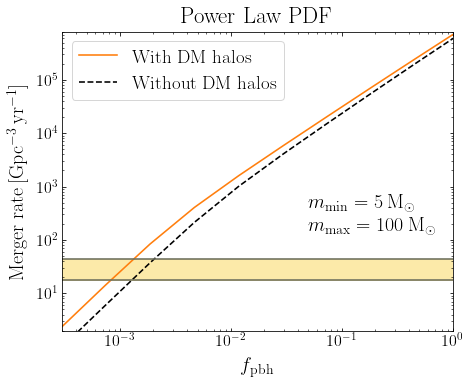

In [9]:
merge_PWRhalo_1 = np.load('merge_PWRhalo_1.npy')
merge_PWR_1 = np.load('merge_PWR_1.npy')

plt.figure(figsize = (7, 5.5))
plt.rcParams['font.family'] = 'serif'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.tick_params(which='both', right=True, top=True)

plt.text(5e-2, 4e2, "$m_\mathrm{{min}} = 5 \: \mathrm{M_{\odot}}$", size = 20)
plt.text(5e-2, 1.5e2, "$m_\mathrm{{max}} = 100 \: \mathrm{M_{\odot}}$", size = 20)


plt.rc('lines', linewidth = 1.6)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)


plt.loglog(f_pbh_list, merge_PWRhalo_1, 'C1')
plt.loglog(f_pbh_list, merge_PWR_1, 'k', linestyle = '--')



plt.xlim(3e-4, 1)
plt.ylim(2, 8e5)




plt.axhline(y = 17.9, color = '#6E705E')
plt.axhline(y = 44, color = '#6E705E')
plt.axhspan(17.9, 44, 1e-4, 1, color='#FBDD70', alpha=0.6)



plt.xlabel('$f_\mathrm{{pbh}}$', fontsize = 20, labelpad = 9)
plt.ylabel('Merger rate$\,[\mathrm{Gpc^{-3}\,yr^{-1}}]$', fontsize = 20, labelpad = 9)
plt.legend(["With DM halos", "Without DM halos"], prop = {'size':19}, loc = 'upper left', 
           facecolor = 'white', fontsize = 110)
plt.title('Power Law PDF', fontsize = 23, pad = 9)
plt.savefig('1PWRmergervsf.pdf', bbox_inches = 'tight')
plt.show()

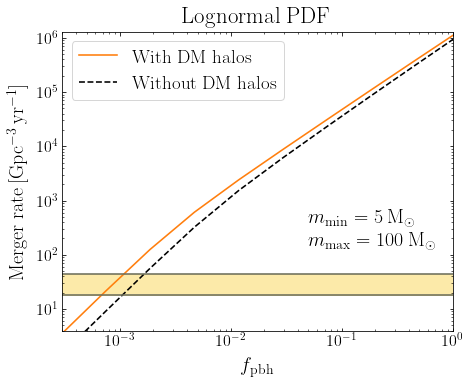

In [10]:
merge_Lognormalhalo_1 = np.load('merge_Lognormalhalo_1.npy')
merge_Lognormal_1 = np.load('merge_Lognormal_1.npy')

plt.figure(figsize = (7, 5.5))
plt.rcParams['font.family'] = 'serif'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.tick_params(which='both', right=True, top=True)

plt.text(5e-2, 4e2, "$m_\mathrm{{min}} = 5 \: \mathrm{M_{\odot}}$", size = 20)
plt.text(5e-2, 1.5e2, "$m_\mathrm{{max}} = 100 \: \mathrm{M_{\odot}}$", size = 20)


plt.rc('lines', linewidth = 1.6)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.loglog(f_pbh_list, merge_Lognormalhalo_1, 'C1')
plt.loglog(f_pbh_list, merge_Lognormal_1, 'k', linestyle = '--')

plt.xlim(3e-4, 1)
plt.ylim(4, 1.3e6)



plt.axhline(y = 17.9, color = '#6E705E')
plt.axhline(y = 44, color = '#6E705E')
plt.axhspan(17.9, 44, 1e-4, 1, color='#FBDD70', alpha=0.6)


plt.xlabel('$f_\mathrm{{pbh}}$', fontsize = 20, labelpad = 9)
plt.ylabel('Merger rate$\,[\mathrm{Gpc^{-3}\,yr^{-1}}]$', fontsize = 20, labelpad = 9)
plt.legend(["With DM halos", "Without DM halos"], prop = {'size':19}, loc = 'upper left', 
           facecolor = 'white', fontsize = 110)
plt.title('Lognormal PDF', fontsize = 23, pad = 9)
plt.savefig('1Lgnmlmergervsf.pdf', bbox_inches = 'tight')
plt.show()

In [3]:
# I have used the same values as you sent me after understanding the logic.

bin_centres = np.geomspace(1e-2, 96, 11)
bin_edges = np.sqrt(bin_centres[:-1]*bin_centres[1:])


ratio = bin_edges[1]/bin_edges[0] 
bin_edges = np.append(bin_edges[0]/ratio, bin_edges) 
bin_edges = np.append(bin_edges, bin_edges[-1]*ratio) 


deltas = np.diff(bin_edges)




Δ_1_list = deltas.tolist()
Δ_2_list = deltas.tolist()



m_1 = np.geomspace(1e-2, 96, 11)
m_2 = np.geomspace(1e-2, 96, 11)


m_1_list = m_1.tolist()
m_2_list = m_2.tolist()   
    


m_1_list = list(map(lambda x: float(format(x, '.2f')), m_1_list))   
m_2_list = list(map(lambda x: float(format(x, '.2f')), m_2_list)) 



# To save some time I wrote them by hand.
m_1_list = [0.01, 0.03, 0.06, 0.2, 0.4, 1, 3, 7, 16, 39, 96] 
m_2_list = [0.01, 0.03, 0.06, 0.2, 0.4, 1, 3, 7, 16, 39, 96]



Δ_1_list = list(map(lambda x: float(format(x, '.8f')),  Δ_1_list))   
Δ_2_list = list(map(lambda x: float(format(x, '.8f')),  Δ_2_list)) 
    

print('\v')
print("m_1 =", m_1_list, "M☉")
print('\v')
print("Δ_1 =", Δ_1_list)



m_min = 1e-3  #in units of M☉
m_max = 100   #in units of M☉

X_min = 1e-6
X_max = 1e5

f = np.geomspace(1e-4, 1, 11)
f_pbh = f/0.85
f_pbh_list = f_pbh.tolist()


m_1 = [0.01, 0.03, 0.06, 0.2, 0.4, 1, 3, 7, 16, 39, 96] M☉

Δ_1 = [0.00949415, 0.02375107, 0.05941695, 0.14864061, 0.37184728, 0.93023298, 2.32712042, 5.82164849, 14.56374623, 36.43344398, 91.14384576]


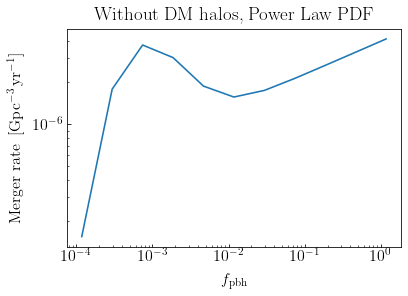

In [4]:
# Calculation of the 2D merger rate for Powerlaw PBH mass distribution. 
#The resolution of the PBHs masses m_1 is Δ_1 and of m_2 is Δ_2.

DM_halos_presence = 'False'
Merger_PWR_2 = np.zeros((11, 11))
merge_PWR_2 = np.zeros(len(m_1_list))


for z, f_pbh in enumerate(f_pbh_list):
    
    merger_sum = 0
    
    for i, (m_1, Δ_1)  in enumerate(zip(m_1_list, Δ_1_list)):
        
        merger_individual = 0
        
        for j, (m_2, Δ_2)  in enumerate(zip(m_2_list, Δ_2_list)):
         
            
            f =  f_pbh*0.85
            
            def P(m): #Powerlaw PBH mass distribution
                α = 1.6
                M = 1e-3    #in units of M☉, for PBHs mass range of m_min = 5 M☉ - m_min = 100 M☉ .
                return ((α-1)/M) * ((m/M)**(-α))

            if i==j:
                Merger_PWR_2[i,j] = 0.5 * merger_rate(m_1, m_2, Δ_1, Δ_2, t_m, DM_halos_presence)
            
            else:
                Merger_PWR_2[i,j] = merger_rate( m_1, m_2, Δ_1, Δ_2, t_m, DM_halos_presence)   
            
            if m_1 > m_2:
                merger_individual = merger_individual +  Merger_PWR_2[i,j]
        
            else:
                merger_individual = 0
            
            merger_sum = merger_sum + merger_individual
            
            merge_PWR_2[z]  = merger_sum
            


np.save("merge_PWR_2", merge_PWR_2)




plt.figure(figsize = (6, 4))
plt.rcParams['font.family'] = 'serif'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'


#plt.text(1e-4, 1e6, "$m_\mathrm{{min}} = 10^{-3} \: \mathrm{M_{\odot}}$", size = 18)
#plt.text(1e-4, 1e5, "$m_\mathrm{{max}} = 100 \: \mathrm{M_{\odot}}$", size = 18)


plt.rc('lines', linewidth = 1.6)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.loglog(f_pbh_list, merge_PWR_2)
plt.xlabel('$f_\mathrm{{pbh}}$', fontsize = 16, labelpad = 9)
plt.ylabel('Merger rate $\,[\mathrm{Gpc^{-3}\,yr^{-1}}]$', fontsize = 16, labelpad = 9)
plt.title('Without DM halos, Power Law PDF', fontsize = 19, pad = 9)
plt.show()

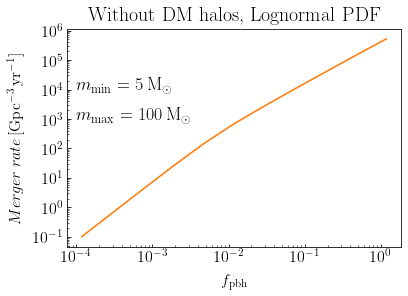

In [5]:
# Calculation of the 2D merger rate for Powerlaw PBH mass distribution. 
#The resolution of the PBHs masses m_1 is Δ_1 and of m_2 is Δ_2.


DM_halos_presence = 'False'
Merger_Lognormal_2 = np.zeros((11, 11))


merge_Lognormal_2 = np.zeros(len(m_1_list))


for z, f_pbh in enumerate(f_pbh_list):
    
    merger_sum = 0
    
    for i, (m_1, Δ_1)  in enumerate(zip(m_1_list, Δ_1_list)):
        
        merger_individual = 0
        
        for j, (m_2, Δ_2)  in enumerate(zip(m_2_list, Δ_2_list)):
         
            
            f = f_pbh * 0.85
            
            def P(m):                  #Log-Normal PBH mass Distribution
                σ = 0.6
                m_c = 15               #in units of M☉, for PBHs mass range of m_min = 5 M☉ - m_max = 100 M☉ .
                return  (1/(σ * m * np.sqrt(2*π))) * np.exp(-(((np.log(m/m_c))**2)/(2*(σ**2))))

            if i==j:
                Merger_Lognormal_2[i,j] = 0.5 * merger_rate(m_1, m_2, Δ_1, Δ_2, t_m, DM_halos_presence)
            
            else:
                Merger_Lognormal_2[i,j] = merger_rate( m_1, m_2, Δ_1, Δ_2, t_m, DM_halos_presence)   
            
            
            if m_1 > m_2:
                merger_individual = merger_individual +  Merger_Lognormal_2[i,j]
        
            else:
                merger_individual = 0
            
            merger_sum = merger_sum + merger_individual
    
            merge_Lognormal_2[z]  = merger_sum
   
        
np.save("merge_Lognormal_2", merge_Lognormal_2)
    

    
    
plt.figure(figsize = (6, 4))
plt.rcParams['font.family'] = 'serif'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'


plt.text(1e-4, 1e4, "$m_\mathrm{{min}} = 5 \: \mathrm{M_{\odot}}$", size = 18)
plt.text(1e-4, 1e3, "$m_\mathrm{{max}} = 100 \: \mathrm{M_{\odot}}$", size = 18)


plt.rc('lines', linewidth = 1.6)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.loglog(f_pbh_list, merge_Lognormal_2, 'C1')
plt.xlabel('$f_\mathrm{{pbh}}$', fontsize = 16, labelpad = 9)
plt.ylabel('$Merger \: rate\,[\mathrm{Gpc^{-3}\,yr^{-1}}]$', fontsize = 16, labelpad = 9)
plt.title('Without DM halos, Lognormal PDF', fontsize = 20, pad = 9)
plt.show()

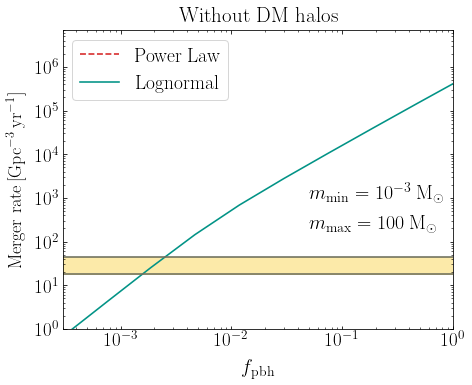

ValueError: x must be increasing if s > 0

In [6]:
merge_PWR_2 = np.load('merge_PWR_2.npy')
merge_Lognormal_2 = np.load('merge_Lognormal_2.npy')



plt.figure(figsize = (7, 5.5))
plt.rcParams['font.family'] = 'serif'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.tick_params(which = 'both', right = True, top = True)



plt.text(0.05, 1e3, "$m_\mathrm{{min}} = 10^{-3} \: \mathrm{M_{\odot}}$", size = 20)
plt.text(0.05, 2e2, "$m_\mathrm{{max}} = 100 \: \mathrm{M_{\odot}}$", size = 20)



plt.rc('lines', linewidth = 1.6)
plt.xticks(fontsize = 19)
plt.yticks(fontsize = 19)



plt.loglog(f_pbh_list, merge_PWR_2, 'C3', linestyle = '--')
plt.loglog(f_pbh_list, merge_Lognormal_2, '#029386')

plt.xlim(3e-4, 1)
plt.ylim(1, 7e6)


plt.axhline(y = 17.9, color = '#6E705E')
plt.axhline(y = 44, color = '#6E705E')
plt.axhspan(17.9, 44, 1e-4, 1, color='#FBDD70', alpha=0.6)


plt.xlabel('$f_\mathrm{{pbh}}$', fontsize = 20, labelpad = 9)
plt.ylabel('Merger rate$\,[\mathrm{Gpc^{-3}\,yr^{-1}}]$', fontsize = 18, labelpad = 9)
plt.legend([  "Power Law", "Lognormal"], prop = {'size':19.5}, loc = 'upper left', 
           facecolor = 'white', fontsize = 110)
plt.title('Without DM halos', fontsize = 21, pad = 9)
plt.savefig('2mergervsfnoDM.pdf', bbox_inches = 'tight')
plt.show()




# Since for BBHs the merger rates detected by LIGO are in range (12 - 213) Gpc⁻3 yr^-1. 
# So, Huang paper follows the method of plotting merger rate vs f_pbh and then picking out the 
# values of f_pbh = f * 0.85 for the values of f having merger rate at 12 Gpc⁻3 yr^-1 and 213 Gpc⁻3 yr^-1.
# And this is how they set a limit to f_pbh as per the mergers seen by LIGO. 

# So, I tried doing the same and see if the values of f and f_pbh used by us so far in the calculations of 
# merger rates are in the same limit or not. Turns out not. 
# In our case f_pbh is having smaller values for both Power Law and Lognoraml PDF.


f_pbh_PWR_lowerlimit = interpolation(merge_PWR_2, f_pbh_list, 17.9)
f_pbh_PWR_upperlimit = interpolation(merge_PWR_2, f_pbh_list, 44)
f_pbh_Lognormal_lowerlimit = interpolation(merge_Lognormal_2, f_pbh_list, 17.9)
f_pbh_Lognormal_upperlimit = interpolation(merge_Lognormal_2, f_pbh_list, 44)


print("f_pbh_PWR_17.9 =", '%0.2e'%f_pbh_PWR_lowerlimit)
print("f_pbh_PWR_44 =", '%0.2e'%f_pbh_PWR_upperlimit)
print('\v')
print("f_pbh_Lognormal_17.9 =", '%0.2e'%f_pbh_Lognormal_lowerlimit)
print("f_pbh_Lognormal_44 =", '%0.2e'%f_pbh_Lognormal_upperlimit)

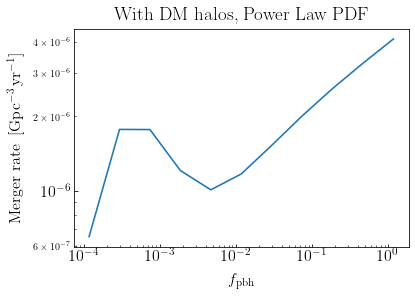

In [8]:
# Calculation of the 2D merger rate for Powerlaw PBH mass distribution. 
#The resolution of the PBHs masses m_1 is Δ_1 and of m_2 is Δ_2.

DM_halos_presence = 'True'
Merger_PWRhalo_2 = np.zeros((11, 11))
merge_PWRhalo_2 = np.zeros(len(m_1_list))


for z, f_pbh in enumerate(f_pbh_list):
    
    merger_sum = 0
    
    for i, (m_1, Δ_1)  in enumerate(zip(m_1_list, Δ_1_list)):
        
        merger_individual = 0
        
        for j, (m_2, Δ_2)  in enumerate(zip(m_2_list, Δ_2_list)):
         
            
            f =  f_pbh*0.85
            
            def P(m): #Powerlaw PBH mass distribution
                α = 1.6
                M = 1e-3     #in units of M☉, for PBHs mass range of m_min = 5 M☉ - m_min = 100 M☉ .
                return ((α-1)/M) * ((m/M)**(-α))

            if i==j:
                Merger_PWRhalo_2[i,j] = 0.5 * merger_rate(m_1, m_2, Δ_1, Δ_2, t_m, DM_halos_presence)
            
            else:
                Merger_PWRhalo_2[i,j] = merger_rate( m_1, m_2, Δ_1, Δ_2, t_m, DM_halos_presence)   
            
            if m_1 > m_2:
                merger_individual = merger_individual +  Merger_PWRhalo_2[i,j]
        
            else:
                merger_individual = 0
            
            merger_sum = merger_sum + merger_individual
            
            merge_PWRhalo_2[z]  = merger_sum
            

np.save("merge_PWRhalo_2", merge_PWRhalo_2)




plt.figure(figsize = (6, 4))
plt.rcParams['font.family'] = 'serif'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'


#plt.text(1e-4, 1e6, "$m_\mathrm{{min}} = 10^{-3} \: \mathrm{M_{\odot}}$", size = 18)
#plt.text(1e-4, 1e5, "$m_\mathrm{{max}} = 100 \: \mathrm{M_{\odot}}$", size = 18)


plt.rc('lines', linewidth = 1.6)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.loglog(f_pbh_list, merge_PWRhalo_2)
plt.xlabel('$f_\mathrm{{pbh}}$', fontsize = 16, labelpad = 9)
plt.ylabel('Merger rate $\,[\mathrm{Gpc^{-3}\,yr^{-1}}]$', fontsize = 16, labelpad = 9)
plt.title('With DM halos, Power Law PDF', fontsize = 19, pad = 9)
plt.show()

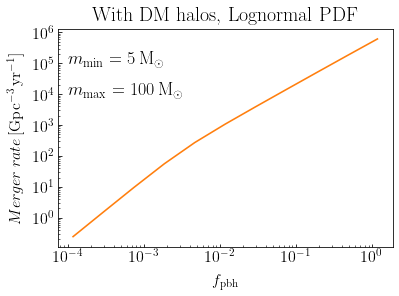

In [9]:
# Calculation of the 2D merger rate for Powerlaw PBH mass distribution. 
#The resolution of the PBHs masses m_1 is Δ_1 and of m_2 is Δ_2.


DM_halos_presence = 'True'
Merger_Lognormalhalo_2 = np.zeros((11, 11))


merge_Lognormalhalo_2 = np.zeros(len(m_1_list))


for z, f_pbh in enumerate(f_pbh_list):
    
    merger_sum = 0
    
    for i, (m_1, Δ_1)  in enumerate(zip(m_1_list, Δ_1_list)):
        
        merger_individual = 0
        
        for j, (m_2, Δ_2)  in enumerate(zip(m_2_list, Δ_2_list)):
         
            
            f = f_pbh * 0.85
            
            def P(m):                  #Log-Normal PBH mass Distribution
                σ = 0.6
                m_c = 15               #in units of M☉, for PBHs mass range of m_min = 5 M☉ - m_max = 100 M☉ .
                return  (1/(σ * m * np.sqrt(2*π))) * np.exp(-(((np.log(m/m_c))**2)/(2*(σ**2))))

            if i==j:
                Merger_Lognormalhalo_2[i,j] = 0.5 * merger_rate(m_1, m_2, Δ_1, Δ_2, t_m, DM_halos_presence)
            
            else:
                Merger_Lognormalhalo_2[i,j] = merger_rate( m_1, m_2, Δ_1, Δ_2, t_m, DM_halos_presence)   
            
            
            if m_1 > m_2:
                merger_individual = merger_individual +  Merger_Lognormalhalo_2[i,j]
        
            else:
                merger_individual = 0
            
            merger_sum = merger_sum + merger_individual
    
            merge_Lognormalhalo_2[z]  = merger_sum
   
        
np.save("merge_Lognormalhalo_2", merge_Lognormalhalo_2)
    

    
    
plt.figure(figsize = (6, 4))
plt.rcParams['font.family'] = 'serif'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'


plt.text(1e-4, 1e5, "$m_\mathrm{{min}} = 5 \: \mathrm{M_{\odot}}$", size = 18)
plt.text(1e-4, 1e4, "$m_\mathrm{{max}} = 100 \: \mathrm{M_{\odot}}$", size = 18)


plt.rc('lines', linewidth = 1.6)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.loglog(f_pbh_list, merge_Lognormalhalo_2, 'C1')
plt.xlabel('$f_\mathrm{{pbh}}$', fontsize = 16, labelpad = 9)
plt.ylabel('$Merger \: rate\,[\mathrm{Gpc^{-3}\,yr^{-1}}]$', fontsize = 16, labelpad = 9)
plt.title('With DM halos, Lognormal PDF', fontsize = 20, pad = 9)
plt.show()

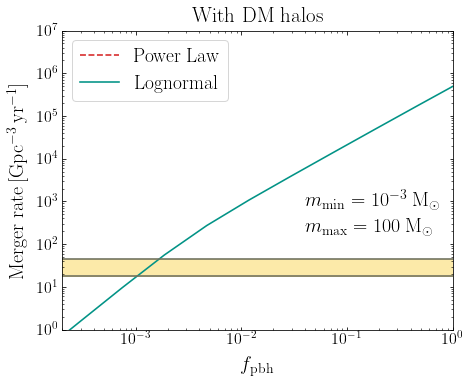

ValueError: x must be increasing if s > 0

In [10]:
merge_PWRhalo_2 = np.load('merge_PWRhalo_2.npy')
merge_Lognormalhalo_2 = np.load('merge_Lognormalhalo_2.npy')



plt.figure(figsize = (7, 5.5))
plt.rcParams['font.family'] = 'serif'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.tick_params(which='both', right=True, top=True)

plt.text(0.04, 8e2, "$m_\mathrm{{min}} = 10^{-3} \: \mathrm{M_{\odot}}$", size = 20)
plt.text(0.04, 2e2, "$m_\mathrm{{max}} = 100 \: \mathrm{M_{\odot}}$", size = 20)

plt.yscale('log')
plt.rc('lines', linewidth = 1.6)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

plt.loglog(f_pbh_list, merge_PWRhalo_2, 'C3', linestyle = '--')
plt.loglog(f_pbh_list, merge_Lognormalhalo_2, '#029386')

plt.xlim(2e-4, 1)
plt.ylim(1, 1e7)



plt.axhline(y = 17.9, color = '#6E705E')
plt.axhline(y = 44, color = '#6E705E')
plt.axhspan(17.9, 44, 1e-4, 1, color='#FBDD70', alpha=0.6)


plt.xlabel('$f_\mathrm{{pbh}}$', fontsize = 20, labelpad = 9)
plt.ylabel('Merger rate$\,[\mathrm{Gpc^{-3}\,yr^{-1}}]$', fontsize = 20, labelpad = 9)
plt.legend(["Power Law", "Lognormal"], prop = {'size':19.5}, loc = 'upper left', 
           facecolor = 'white', fontsize = 110)
plt.title('With DM halos', fontsize = 21, pad = 9)
plt.savefig('2mergervsf.pdf', bbox_inches = 'tight')
plt.show()




# Since for BBHs the merger rates detected by LIGO are in range (12 - 213) Gpc⁻3 yr^-1. 
# So, Huang paper follows the method of plotting merger rate vs f_pbh and then picking out the 
# values of f_pbh = f * 0.85 for the values of f having merger rate at 12 Gpc⁻3 yr^-1 and 213 Gpc⁻3 yr^-1.
# And this is how they set a limit to f_pbh as per the mergers seen by LIGO. 

# So, I tried doing the same and see if the values of f and f_pbh used by us so far in the calculations of 
# merger rates are in the same limit or not. Turns out not. 
# In our case f_pbh is having smaller values for both Power Law and Lognoraml PDF.


f_pbh_PWRhalo_lowerlimit = interpolation(merge_PWRhalo_2, f_pbh_list, 17.9)
f_pbh_PWRhalo_upperlimit = interpolation(merge_PWRhalo_2, f_pbh_list, 44)
f_pbh_Lognormalhalo_lowerlimit = interpolation(merge_Lognormalhalo_2, f_pbh_list, 17.9)
f_pbh_Lognormalhalo_upperlimit = interpolation(merge_Lognormalhalo_2, f_pbh_list, 44)


print("f_pbh_PWRhalo_17.9 =", '%0.2e'%f_pbh_PWRhalo_lowerlimit)
print("f_pbh_PWRhalo_44 =", '%0.2e'%f_pbh_PWRhalo_upperlimit)
print('\v')
print("f_pbh_Lognormalhalo_17.9 =", '%0.2e'%f_pbh_Lognormalhalo_lowerlimit)
print("f_pbh_Lognormalhalo_44 =", '%0.2e'%f_pbh_Lognormalhalo_upperlimit)

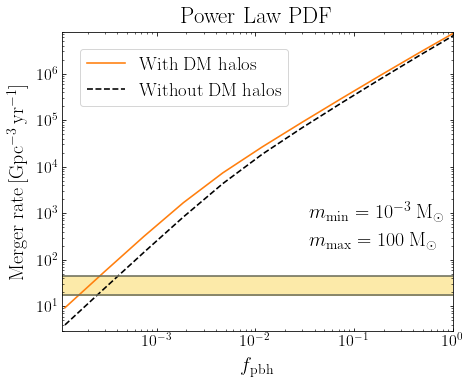

In [27]:
merge_PWRhalo_2 = np.load('merge_PWRhalo_2.npy')
merge_PWR_2 = np.load('merge_PWR_2.npy')

plt.figure(figsize = (7, 5.5))
plt.rcParams['font.family'] = 'serif'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.tick_params(which='both', right=True, top=True)

plt.text(0.035, 8e2, "$m_\mathrm{{min}} = 10^{-3} \: \mathrm{M_{\odot}}$", size = 20)
plt.text(0.035, 2e2, "$m_\mathrm{{max}} = 100 \: \mathrm{M_{\odot}}$", size = 20)


plt.rc('lines', linewidth = 1.6)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)


plt.loglog(f_pbh_list, merge_PWRhalo_2, 'C1')
plt.loglog(f_pbh_list, merge_PWR_2, 'k', linestyle = '--')



plt.xlim(1.1e-4, 1)
plt.ylim(3, 8e6)




plt.axhline(y = 17.9,  color = '#6E705E')
plt.axhline(y = 44, color = '#6E705E')
plt.axhspan(17.9, 44, 1e-4, 1, color='#FBDD70', alpha=0.6)



plt.xlabel('$f_\mathrm{{pbh}}$', fontsize = 20, labelpad = 9)
plt.ylabel('Merger rate$\,[\mathrm{Gpc^{-3}\,yr^{-1}}]$', fontsize = 20, labelpad = 9)
plt.legend(["With DM halos", "Without DM halos"], prop = {'size':18.7}, loc = (0.045, 0.75), 
           facecolor = 'white', fontsize = 110)
plt.title('Power Law PDF', fontsize = 23, pad = 9)
plt.savefig('2PWRmergervsf.pdf', bbox_inches = 'tight')
plt.show()

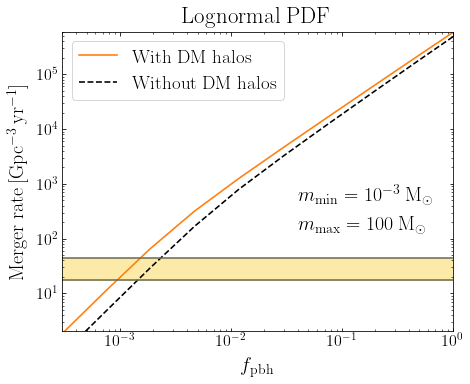

In [28]:
merge_Lognormalhalo_2 = np.load('merge_Lognormalhalo_2.npy')
merge_Lognormal_2 = np.load('merge_Lognormal_2.npy')



plt.figure(figsize = (7, 5.5))
plt.rcParams['font.family'] = 'serif'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.tick_params(which='both', right=True, top=True)

plt.text(0.04, 0.5e3, "$m_\mathrm{{min}} = 10^{-3} \: \mathrm{M_{\odot}}$", size = 20)
plt.text(0.04, 1.5e2, "$m_\mathrm{{max}} = 100 \: \mathrm{M_{\odot}}$", size = 20)


plt.rc('lines', linewidth = 1.6)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.loglog(f_pbh_list, merge_Lognormalhalo_2, 'C1')
plt.loglog(f_pbh_list, merge_Lognormal_2, 'k', linestyle = '--')

plt.xlim(3e-4, 1)
plt.ylim(2.1, 6e5)



plt.axhline(y = 17.9, color = '#6E705E')
plt.axhline(y = 44, color = '#6E705E')
plt.axhspan(17.9, 44, 1e-4, 1, color='#FBDD70', alpha=0.6)


plt.xlabel('$f_\mathrm{{pbh}}$', fontsize = 20, labelpad = 9)
plt.ylabel('Merger rate$\,[\mathrm{Gpc^{-3}\,yr^{-1}}]$', fontsize = 20, labelpad = 9)
plt.legend(["With DM halos", "Without DM halos"], prop = {'size':19}, loc = 'upper left', 
           facecolor = 'white', fontsize = 110)
plt.title('Lognormal PDF', fontsize = 23, pad = 9)
plt.savefig('2Lgnmlmergervsf.pdf', bbox_inches = 'tight')
plt.show()

In [ ]:
# With the condition that m_1, m_2 ≥ 5 M☉ :-

# So, for the merger rate R_12 of masses m_1 and m_2 in range 5 M☉ - 100 M☉ with
# values 17.9 - 44 Gpc⁻3 yr⁻1, following are the values of f_pbh:-


# A.) For the PBH mass range of m_1 = m_2 = (5 - 100) M☉:-
     # 1.) For PBH binaries without DM halos
           # a.) Power law PDF -   1.17e-3 ≤ f_pbh ≤ 1.97e-3
           # b.) Lognormal PDF -   9.52e-4 ≤ f_pbh ≤ 1.57e-3
            
      # 2.) For PBH binaries with DM halos
           # c.) Power law PDF -   8.00e-4 ≤ f_pbh ≤ 1.22e-3
           # d.) Lognormal PDF -   6.56e-4 ≤ f_pbh ≤ 9.87e-4
              

                
# B.) For the PBH mass range of m_1 = m_2 = (1e-3 - 100) M☉:-
     # 3.) For PBH binaries without DM halos
           # e.) Power law PDF -   f_pbh = 1.18
           # f.) Lognormal PDF -   1.48e-3 ≤ f_pbh ≤ 2.31e-3
            
      # 4.) For PBH binaries with DM halos
           # g.) Power law PDF -   f_pbh = 1.18
           # h.) Lognormal PDF -   9.44e-04 ≤ f_pbh ≤ 1.57e-3
     

In [25]:
# With the condition that m_1, m_2 ≥ m_min:-

# So, for the merger rate R_12 of masses m_1 and m_2 in range 5 M☉ - 100 M☉ with
# values 17.9 - 44 Gpc⁻3 yr⁻1, following are the values of f_pbh:-


# A.) For the PBH mass range of m_1 = m_2 = (5 - 100) M☉:-
     # 1.) For PBH binaries without DM halos
           # a.) Power law PDF -   1.17e-3 ≤ f_pbh ≤ 1.97e-3
           # b.) Lognormal PDF -   9.52e-4 ≤ f_pbh ≤ 1.57e-3
            
      # 2.) For PBH binaries with DM halos
           # c.) Power law PDF -   8.00e-4 ≤ f_pbh ≤ 1.22e-3
           # d.) Lognormal PDF -   6.56e-4 ≤ f_pbh ≤ 9.87e-4
              

                
# B.) For the PBH mass range of m_1 = m_2 = (1e-3 - 100) M☉:-
     # 3.) For PBH binaries without DM halos
           # e.) Power law PDF -   2.40e-4 ≤ f_pbh ≤ 3.69e-4
           # f.) Lognormal PDF -   1.35e-3 ≤ f_pbh ≤ 2.17e-3
            
      # 4.) For PBH binaries with DM halos
           # g.) Power law PDF -   1.51e-4 ≤ f_pbh ≤ 2.52e-4
           # h.) Lognormal PDF -   8.83e-04 ≤ f_pbh ≤ 1.43e-3
     